<a href="https://colab.research.google.com/github/UnplugCharger/Group-Pandas/blob/master/TEAM_PANDAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## *1.* Defining the Question

**Overview**

We will work as a Data Scientist who are working for DeBeers which is an international data mining company. In order to effeciently get into new markets, understanding the products and the product pricing is key.

In an effort to do this, we need to identify the best indicators of diamond pricing of diamond with relation to the 4-CS (color, clarity, carat and cut) and other features of a diamond such as width. 

To work on this project, we will perform the following analysis with Python; 

1. Find and deal with outliers, anomalies, and missing data 
within the dataset.
2. Plot appropriate univariate and bivariate summaries recording our observations.
3. Implement the solution by performing hypothesis testing for various claims;
  >* The average carats sold for fair cut diamonds is less than ideal cut diamonds
  * The average price of diamonds of the fair cut is less than that of an ideal cut diamond
  * The average price of diamond color D is less than the price of diamond color J

**Dataset** 

* Variable Definitions: https://drive.google.com/file/d/1ePooFRtgnpFf8_tvyJFBzqwz35Wb2im1/view?usp=sharing
* Dataset: https://drive.google.com/file/d/1ePooFRtgnpFf8_tvyJFBzqwz35Wb2im1/view?usp=sharing



**1. DEFINING RESEARCH QUESTION**

We would like to find out the  different factors that affect the price of diamonds.

**2. METRIC FOR SUCCESS**

Getting accurate solutions to our hypotheses

**3. CONTEXT**

Throughout history, the diamond has been an enduring symbol of the powerful bond of love. Its strength, brilliance and value are as unique as the individuals who wear them. A diamond's worth is evaluated on four levels. We call these criteria the 4 C's — cut, carat weight, color and clarity.
Quality of the cut (Fair, Good, Very Good, Premium, Ideal). Diamond colour, from J (worst) to D (best). Clarity of the diamond (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)).
As Diamond traders it is essential for us as data scientists to study and evaluate these factors whan it comes to diamond pricing amoung other factors such as depth, width and length .

**4. EXPERIMENTAL DESIGN**

We took the following steps to get our hypothesis solution

1) Business Understanding: This enabled us to understand the details of the business market , prices, the goods demanded and the aim of the business which is to maximize profit.

2) Reading the data: This enables us to understand our dataset and all the variables provided.

3) Checking our data: This gives us information about our dataset including the shape, data types, columns, statistical summaries and other details about the dataset.

4) Data cleaning: I enables us to come up with clean data that is easier to analyse. This involves reanming columns, checking and dealing with missing values and others .

5) EDA: visualizing and understanding data.

6) Implementing the solution: using hypothesis testing

7)Conclusion


**5. APPROPRIATENESS OF THE AVAILABLE DATA**
The data is relevant as it contains data of diamond specifications of 56000 diamonds which have been widely used for analysis for example in https://www.kaggle.com/shivam2503/diamonds

### e) Data Relevance
> The data is relevant as it contains data of diamond specifications of 56000 diamonds which have been widely used for analysis for example in https://www.kaggle.com/shivam2503/diamonds


## *2.* Reading the Data


In [ ]:
#importing out libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels
from scipy import stats
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import StandardScaler
import random
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Reading the definitions dataset
definition = pd.read_excel('/content/diamond_variable_definitions.xlsx')
definition

,Variable,Definitions
0,carat,weight of the diamond (0.2--5.01)
1,cut,"quality of the cut (Fair, Good, Very Good, Pre..."
2,"color diamond colour, from J (worst) to D (best)","diamond colour, from J (worst) to D (best)"
3,clarity,a measurement of how clear the diamond is (I1...
4,depth,"total depth percentage = z / mean(x, y) = 2 * ..."
5,table,width of top of diamond relative to widest poi...
6,price,"price in US dollars (\$326--\$18,823)"
7,x,length in mm (0--10.74)
8,y,width in mm (0--58.9)
9,z,depth in mm (0--31.8)


In [ ]:
#loading our uploaded data
diamond = pd.read_csv('/content/diamonds.csv')
diamond.head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [ ]:
#preview the tail
diamond.tail(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
53930,53931,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53931,53932,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43
53932,53933,0.70,Very Good,E,VS2,60.5,59.0,2757,5.71,5.76,3.47
53933,53934,0.70,Very Good,E,VS2,61.2,59.0,2757,5.69,5.72,3.49
53934,53935,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [ ]:
# dropping the column unnamed because it is repeated from the index.
diamond.drop(['Unnamed: 0'] , axis=1 , inplace=True)
diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
#checking info
diamond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [ ]:
#counting 
diamond.count()

carat      53940
cut        53940
color      53940
clarity    53940
depth      53940
table      53940
price      53940
x          53940
y          53940
z          53940
dtype: int64

Each of our column has 53940 rows

In [ ]:
diamond.describe()
#in min, on the x, y, z column, min = 0, a diamond cannot have 0 width,and 0 height

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


our total count is 53940
the dispersions are as shown above
we noticed in minimum, we have diamonds with dimension zero, which is impossible. 

DATA CLEANING

In [ ]:
#dropping rows that have dimension zero in the x,y,z column
diamond = diamond[(diamond[['x','y','z']] != 0).all(axis=1)]

In [ ]:
#checking if the zero rows are still there
diamond.loc[(diamond['x']==0) | (diamond['y']==0) | (diamond['z']==0)]
#we do nott have zero rows in our x,y and z columns

,carat,cut,color,clarity,depth,table,price,x,y,z


The rows with the zero have been dropped in the x,y,z columns

In [ ]:
#checking for duplicates in our data.
diamond.duplicated().sum()
# we have 145 duplicates in our data.

145

the dataset has 145 duplicates, we are not dropping them.

In [ ]:
#checking for null values
diamond.isnull().sum()
#we have no null values in our dataset

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

the dataset has no null values.

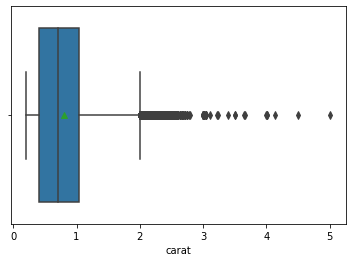

In [ ]:
#checking for outliers in the carat column
sns.boxplot(diamond['carat'], showmeans=True)

most diamond have almost the same carat, but there are few unique diamonds that are greater than the rest

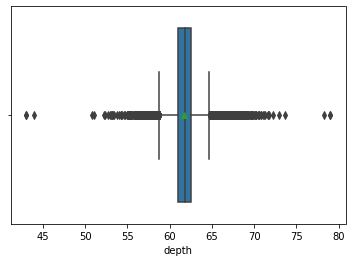

In [ ]:
#checking for outliers in the depth column
sns.boxplot(diamond['depth'], showmeans=True)

most diamonds have depth close to the other, but few have very small depth and other bigger than the others.

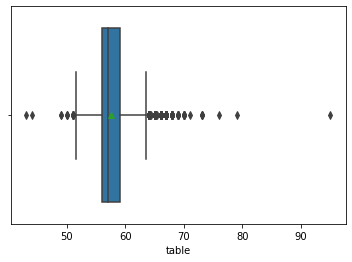

In [ ]:
#checking for outliers in the table column
sns.boxplot(diamond['table'], showmeans=True)

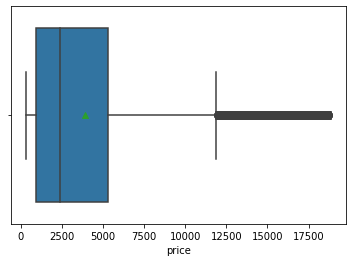

In [ ]:
#checking for outliers in the price column
sns.boxplot(diamond['price'], showmeans = True)

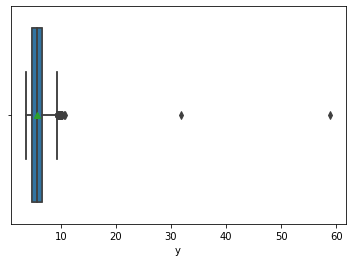

In [ ]:
#checking for outliers in x column
sns.boxplot(diamond['x' ], showmeans = True)


most diamonds have almost equal length, few unique diamonds have greater length than the rest

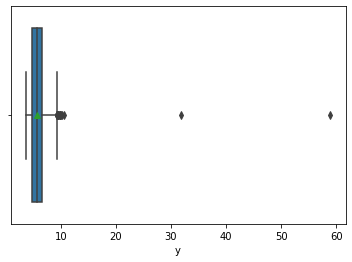

In [ ]:
#checking for outliers in y column
sns.boxplot(diamond['y' ], showmeans = True)

the width of diamond is almost the same across but there are afew with greater width than the other

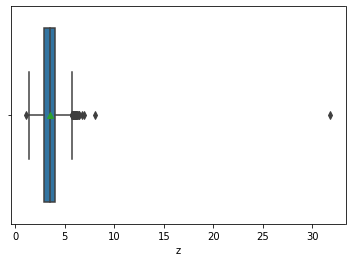

In [ ]:
#checking for outliers in z column
sns.boxplot(diamond['z' ], showmeans = True)

the depth of diamond is almost the same but few have depth greater than the rest

CORRELATION

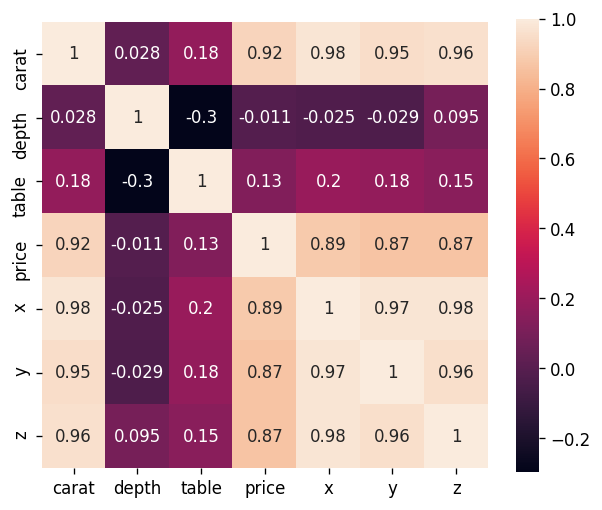

In [ ]:
# Correlation 
plt.figure(dpi = 120,figsize= (6,5))
corr = diamond.corr()
sns.heatmap(data=corr, square=True , annot=True, cbar=True)


 from the heatmap,
 1. the self relation is 1 as always. this is the relation of a variable to itself
 2. price is highly correlated to carat and length(x), width(y) and height(z)
 3. price and depth is inversely related, the deeper the diamond, the darker it gets, the lower the price. shallow diamond is bright and expensive makes it really attractive. 
 4. carat has the most impact on the price.

UNIVARIATE ANALYSIS


Measure of Central Tendency

In [ ]:
#selecting columns to be used in univariate analysis
numeric= list(diamond.columns)
numeric.remove('cut')
numeric.remove('color')
numeric.remove('clarity')
numeric

['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

Mean : a sum of all numbers in a data set divided by the total number of data points

Standard Deviation: a measure of how far each observed value is from the mean

In [ ]:
# Showing mean and standard deviation
for column in numeric:
  print('\n')
  print(column+ ' has a mean of '+ str(diamond[column].mean()))
  print(column+ ' has a standard deviation of '+ str(diamond[column].std()))



carat has a mean of 0.7979397478679852
carat has a standard deviation of 0.47401124440538067


depth has a mean of 61.74940489432624
depth has a standard deviation of 1.4326213188337733


table has a mean of 57.45718390804603
table has a standard deviation of 2.234490562820938


price has a mean of 3932.799721913237
price has a standard deviation of 3989.4397381463023


x has a mean of 5.731157211716609
x has a standard deviation of 1.1217607467924422


y has a mean of 5.734525954764462
y has a standard deviation of 1.1421346741235396


z has a mean of 3.5387337782723316
z has a standard deviation of 0.7056988469499964




*   Price has the highest standard deviation of 3987 followed by table, while carat has the lowest standard deviation of 0.47
*   Price has the highest mean as well followed by depth, while the lowest mean is that of carat which is 0.7976





*   Median: the middle number in a sorted, ascending or descending, list of numbers

*   Mode : the most commonly observed value in a set of data



In [ ]:
# Getting the median and the mode
# The for loop has been used to print out the medium and the mode
for column in numeric:
  print('\n')
  print(column+ ' has a median of '+ str(diamond[column].median()))
  print(column+ ' has a mode of '+ str(diamond[column].mode()))



carat has a median of 0.7
carat has a mode of 0    0.3
dtype: float64


depth has a median of 61.8
depth has a mode of 0    62.0
dtype: float64


table has a median of 57.0
table has a mode of 0    56.0
dtype: float64


price has a median of 2401.0
price has a mode of 0    605
dtype: int64


x has a median of 5.7
x has a mode of 0    4.37
dtype: float64


y has a median of 5.71
y has a mode of 0    4.34
dtype: float64


z has a median of 3.53
z has a mode of 0    2.7
dtype: float64




*   Price has the hghest medium followed by depth
*   Price has the highest mode while carat has the smallest mode



range : the difference between the lowest and highest values

In [ ]:
# Getting the range
def calculating_range(column):
  maximum= diamond[column].max()
  minimum=diamond[column].min()
  column_range= maximum-minimum
  return column_range

for column in numeric:
  print('\n')
  print(column+ ' has a range of '+ str(calculating_range(column)))



carat has a range of 4.81


depth has a range of 36.0


table has a range of 52.0


price has a range of 18497


x has a range of 10.74


y has a range of 58.9


z has a range of 31.8


In [ ]:
# Interquartile range
for column in numeric:
  print('\n')
  print(diamond[column].quantile([0.25,0.5,0.75]))



0.25    0.40
0.50    0.70
0.75    1.04
Name: carat, dtype: float64


0.25    61.0
0.50    61.8
0.75    62.5
Name: depth, dtype: float64


0.25    56.0
0.50    57.0
0.75    59.0
Name: table, dtype: float64


0.25     950.00
0.50    2401.00
0.75    5324.25
Name: price, dtype: float64


0.25    4.71
0.50    5.70
0.75    6.54
Name: x, dtype: float64


0.25    4.72
0.50    5.71
0.75    6.54
Name: y, dtype: float64


0.25    2.91
0.50    3.53
0.75    4.04
Name: z, dtype: float64


Skewness: The degree of distortion from the symmetrical bell curve in a probability distribution.

Kurtosis :The degree to which scores cluster in the the peak of a frequency distribution

In [ ]:
# Getting the Skweness and kurtosis
for column in numeric:
  print('\n')
  print(column+ ', Skewness: '+str(diamond[column].skew()))
  print(column+ ', Kurtosis: '+str(diamond[column].kurt()))



carat, Skewness: 1.116645920812613
carat, Kurtosis: 1.2566353326079294


depth, Skewness: -0.08229402630189467
depth, Kurtosis: 5.739414582329394


table, Skewness: 0.7968958486695427
table, Kurtosis: 2.801856860032039


price, Skewness: 1.618395283383529
price, Kurtosis: 2.17769575924869


x, Skewness: 0.3786763426463927
x, Kurtosis: -0.6181606709137237


y, Skewness: 2.4341667164885554
y, Kurtosis: 91.21455715881


z, Skewness: 1.5224225590685583
z, Kurtosis: 47.086619325118086


Carat has a positive skew Carat has a Leptokurtic/ peaked kurtosis >0

Depth has a negative skew Depth has a Leptokurtic/ peaked kurtosis >0

Table has a positive skew Table has a Leptokurtic/ peaked Kurtosis

Price has a positive skew Price has a Leptokurtic/ peaked kurtosis> 0

X has a symmetrical skew X has a platykurtic/ not peaked kurtosis < 0

y has a positive skew Y has a Leptokurtic/ peaked kurtosis >0

z has a positive skew Z has has a Leptokurtic/ peaked kurtosis >0

HISTOGRAM

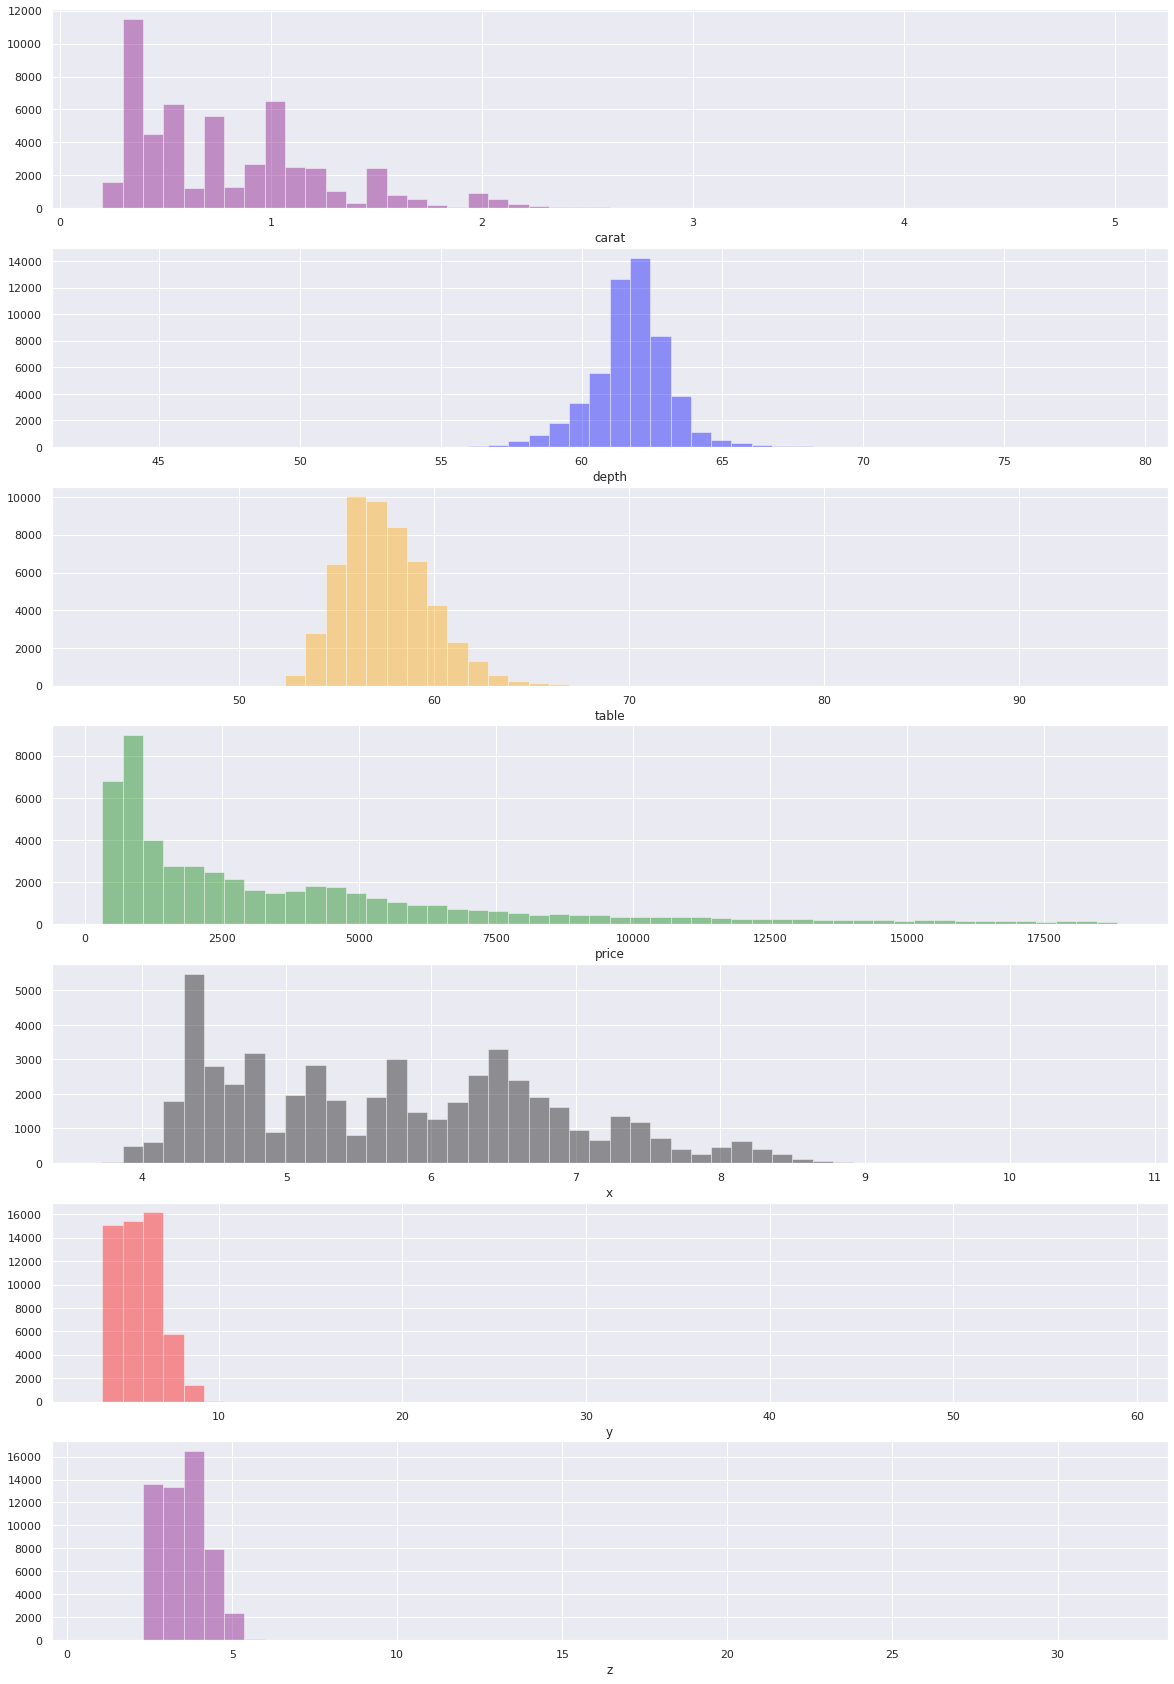

In [ ]:
# Plotting histograms for our numerical variables
sns.set(rc={'figure.figsize':(20,30)})
fig, ((ax1),(ax2),(ax3),(ax4),(ax5),(ax6),(ax7)) = plt.subplots(7)
sns.distplot(diamond['carat'], kde= False,color= 'purple', ax=ax1)
sns.distplot(diamond['depth'], kde= False,color= 'blue', ax=ax2)
sns.distplot(diamond['table'], kde= False,color= 'orange', ax=ax3)
sns.distplot(diamond['price'], kde= False,color= 'green', ax=ax4)
sns.distplot(diamond['x'], kde= False,color= 'black', ax=ax5)
sns.distplot(diamond['y'], kde= False,color= 'red', ax=ax6)
sns.distplot(diamond['z'], kde= False,color= 'purple', ax=ax7)
plt.show()






*   X has a normally skewed histogram without a peak
*   y has a left skewed histogram with a peak
*  z has a left skewed histogram with a peak
*   Carat has a skewed to the left histogram with a peak
*   Depth has a skewed to the right histogram with a peak
*  Table has a skewed to the left histogram with a peak
*   Price has a skewed to the keft histogram with a peak





Bar graphs

A graphical display of data using bars of different heights

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

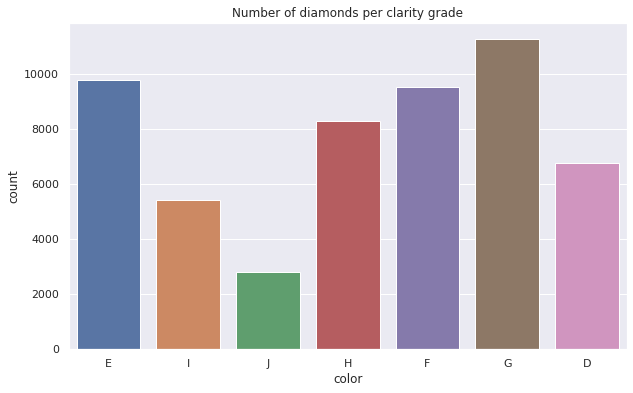

In [ ]:
# Plotting a bar graph counting the number of diamonds per color
sns.set(rc={'figure.figsize':(10,6)})
plt.title("Number of diamonds per clarity grade")
sns.countplot(diamond['color'])
diamond['color'].value_counts()



*   Colorless diamonds(D-F Color Diamonds): The rarest and highest quality with a pure icy look.


*   Near-colorless diamonds (G-H Color Diamonds and I-J Color Diamonds) : No discernible color; great value for the quality.

*   Faint color diamonds (K Color Diamonds): Budget-friendly pick; pairs beautifully with yellow gold.



From our dataset, the number of color G diamonds is the highest followed by E then F


Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

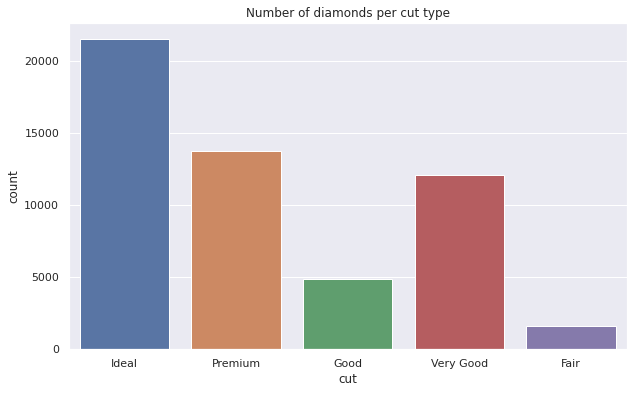

In [ ]:
# Plotting a graph showing the number of diamonds per type of cut
sns.set(rc={'figure.figsize':(10,6)})
plt.title("Number of diamonds per cut type")
sns.countplot(diamond['cut'])
diamond['cut'].value_counts()

* **Premium:** Cut Diamonds provide the highest level of fire and brilliance because almost all of the incoming light is reflected through the table, the diamond radiates with magnificent sparkle.
* **Ideal:** Cut Diamonds offer exceptional brilliance and fire. A large majority of the entering light reflects through the diamond’s table. To the naked eye, Very Good diamonds provide similar sparkle to those of Excellent grade.
* **Very Good:** Cut Diamonds showcase brilliance and sparkle, with much of the light reflecting through the table to the viewer’s eye. These diamonds provide beauty at a lower price point.
* **Good:** Cut Diamonds offer little brilliance, as light easily exits through the bottom and sides of the diamond. Diamonds of a Fair Cut may be a satisfactory choice for smaller carats and those acting as side stones.
* **Fair:** Cut Diamonds yield nearly no sparkle, brilliance or fire. Entering light escapes from the sides and bottom of the diamond.

From our dataset, the highest number of diamonds are of the Ideal cut followed by the premium then Very good

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

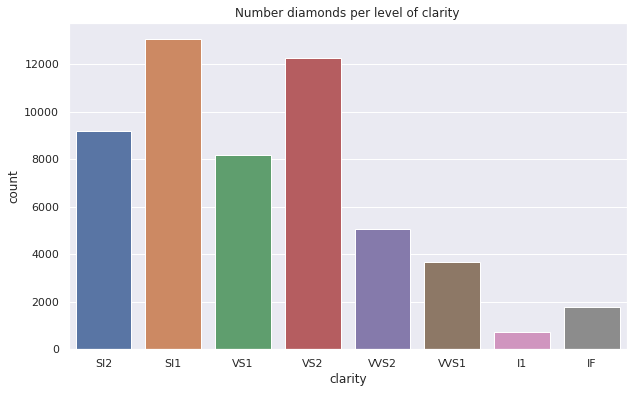

In [ ]:
# Plotting a graph showing the number of diamonds in our dataset per type of clarity grade
plt.title("Number diamonds per level of clarity")
sns.set(rc={'figure.figsize':(10,6)})
sns.countplot(diamond['clarity'])
diamond['clarity'].value_counts()







*   List itemThe GIA Diamond Clarity Scale has 6 categories, some of which are divided, for a total of 11 specific grades.
*   Included (I1, I2, and I3) Inclusions are obvious under 10x magnification which may affect transparency and brilliance


*    Slightly Included (SI1 and SI2) Inclusions are noticeable under 10x magnification
*   Flawless (FL) No inclusions and no blemishes visible under 10x magnification

*   Very, Very Slightly Included (VVS1 and VVS2) Inclusions so slight they are difficult for a skilled grader to see under 10x magnification
*   Very Slightly Included (VS1 and VS2) Inclusions are observed with effort under 10x magnification, but can be characterized as minor








From our dataset, the highest number of diamonds are of the SI1 clarity grade followed by the VS2 then SI1

Pie Chart

A type of graph in which a circle is divided into sectors that each represent a percentage of the whole

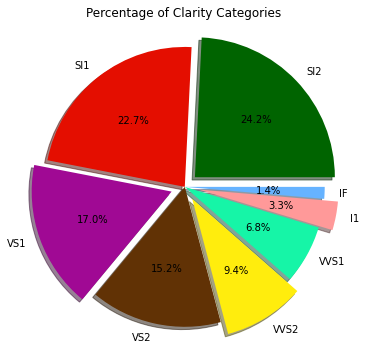

In [ ]:
labels = diamond.clarity.unique().tolist()
sizes = diamond.clarity.value_counts().tolist()
colors = ['#006400', '#E40E00', '#A00994', '#613205', '#FFED0D', '#16F5A7','#ff9999','#66b3ff']
explode = (0.1, 0.0, 0.1, 0, 0.1, 0, 0.1,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=0)
plt.axis('equal')
plt.title("Percentage of Clarity Categories")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

The highest percentage number of diamonds is the SI1 (22.7%) while the smallest is the IF (1.4%)

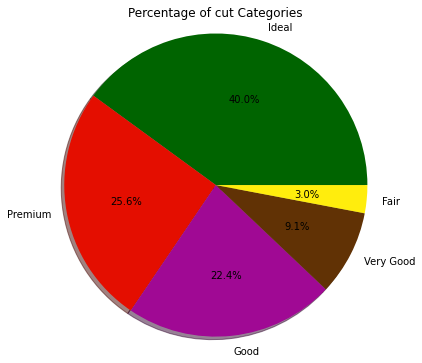

In [ ]:
labels = diamond.cut.unique().tolist()
sizes = diamond.cut.value_counts().tolist()
colors = ['#006400', '#E40E00', '#A00994', '#613205', '#FFED0D', '#16F5A7','#ff9999','#66b3ff']
explode = (0.1, 0.1, 0.1, 0.1, 0.1)
plt.pie(sizes,  labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=0)
plt.axis('equal')
plt.title("Percentage of cut Categories")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(8.5,8.5)
plt.show()

The highest cut category is the ideal (40.0%) while the smallest is the fair cut (3.0%)

**Bivariate Plotting**

clarity
SI2     5060.440174
SI1     3994.112608
I1      3926.189702
VS2     3922.866819
VS1     3839.144308
VVS2    3283.737071
IF      2864.839106
VVS1    2519.512315
Name: price, dtype: float64

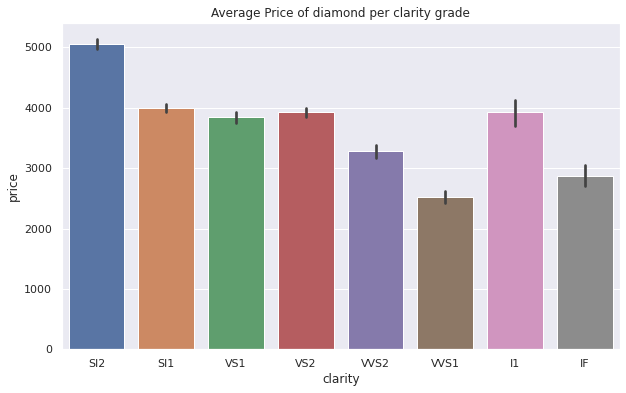

In [ ]:
# Plotting price against the various clarity grades 
plt.title("Average Price of diamond per clarity grade")
sns.set(rc={'figure.figsize':(10,6)})
sns.barplot(x='clarity', y='price', data = diamond)
diamond.groupby('clarity')['price'].mean().sort_values(ascending=False)

> The highest priced clarity is SI2 followed by SI1 on average

> The least priced clarity is VVS1 followed by IF on average

cut
Premium      4579.684543
Fair         4357.500932
Very Good    3981.664101
Good         3926.403509
Ideal        3456.941201
Name: price, dtype: float64

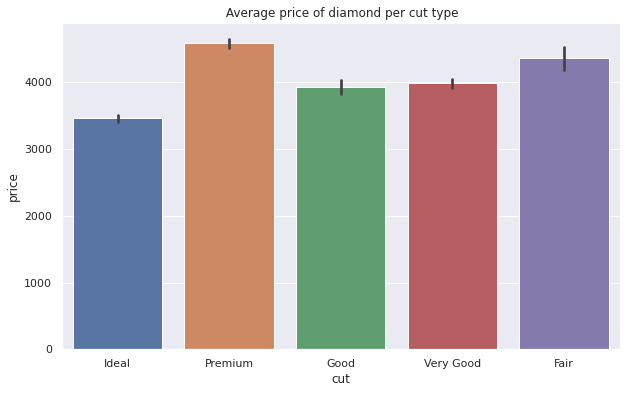

In [ ]:
# Plotting price against cut
plt.title(" Average price of diamond per cut type")
sns.set(rc={'figure.figsize':(10,6)})
sns.barplot(x='cut', y='price', data = diamond)
diamond.groupby('cut')['price'].mean().sort_values(ascending=False)

> The highest priced cut is the premium cut on average

> The lowest priced cut is the ideal cut on average

color
J    5323.818020
I    5089.973990
H    4480.942155
G    3996.876551
F    3725.080205
D    3168.106436
E    3076.752475
Name: price, dtype: float64

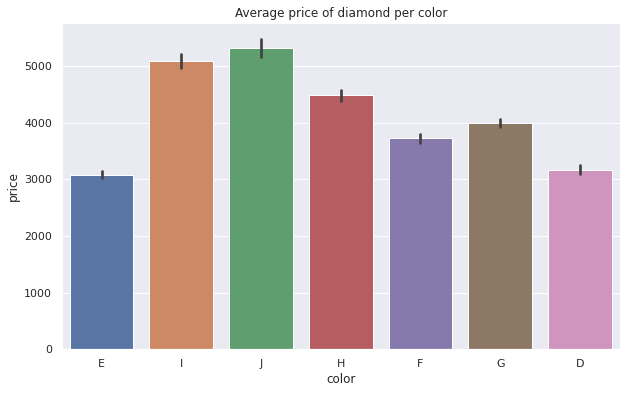

In [ ]:
# Plotting color against price
sns.set(rc={'figure.figsize':(10,6)})
plt.title("Average price of diamond per color")
sns.barplot(x='color', y='price',  data = diamond)
diamond.groupby('color')['price'].mean().sort_values(ascending=False)

 > On average ,the highest priced diamonds according to color is the J followed by the I color then the H color

> On average, the lowest priced diamonds are of the E color

color
J    1.162137
I    1.026702
H    0.911174
G    0.770729
F    0.736480
E    0.657867
D    0.657715
Name: carat, dtype: float64

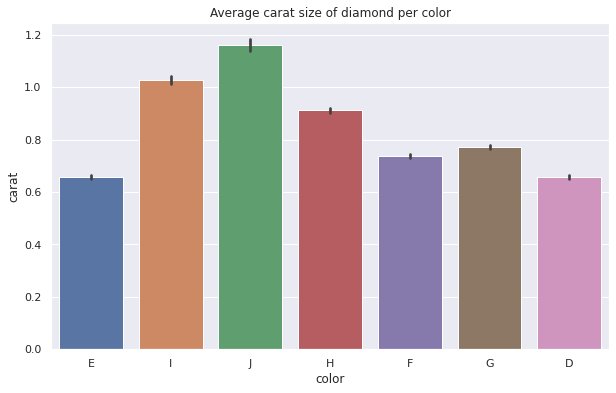

In [ ]:
# Plotting color against carats
sns.set(rc={'figure.figsize':(10,6)})
plt.title("Average carat size of diamond per color")
sns.barplot(x='color', y='carat',  data = diamond)
diamond.groupby('color')['carat'].mean().sort_values(ascending=False)

> Diamonds that are bought with the highest carats are of the J color on average . 

> Diamonds that are bought with the smallest carats are of color D on average.

cut
Fair         1.046078
Premium      0.891409
Good         0.848711
Very Good    0.806365
Ideal        0.702759
Name: carat, dtype: float64

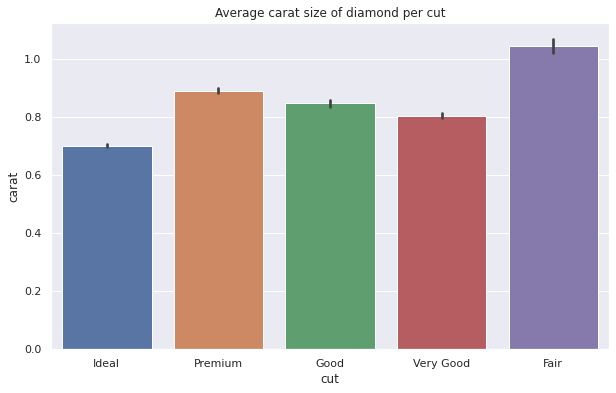

In [ ]:
# Plotting cut against carat
sns.set(rc={'figure.figsize':(10,6)})
plt.title("Average carat size of diamond per cut")
sns.barplot(x='cut', y='carat',  data = diamond)
diamond.groupby('cut')['carat'].mean().sort_values(ascending=False)

> Diamonds that are bought with the highest carats are of the fair cut on average . 

> Diamonds that are bought with the smallest carats are of ideal cut on average.

clarity
I1      1.284146
SI2     1.077308
SI1     0.850272
VS2     0.763716
VS1     0.727108
VVS2    0.596202
IF      0.505123
VVS1    0.503131
Name: carat, dtype: float64

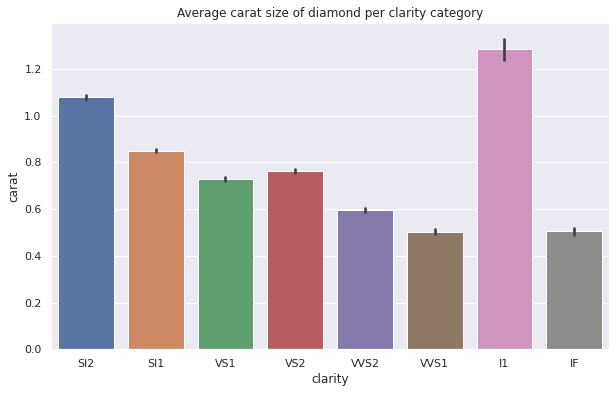

In [ ]:
# Plotting clarity against carat
sns.set(rc={'figure.figsize':(10,6)})
plt.title("Average carat size of diamond per clarity category")
sns.barplot(x='clarity', y='carat',  data = diamond)
diamond.groupby('clarity')['carat'].mean().sort_values(ascending=False)

> Diamonds that are bought with the highest carats are of the I1 clarity on average . 

> Diamonds that are bought with the smallest carats are of VVS1 clarity on average.

The highest priced clarity is SI2 followed by SI1 on average

The least priced clarity is VVS1 followed by IF on average

color
J    1.162137
I    1.026927
H    0.911799
G    0.771190
F    0.736538
E    0.657867
D    0.657795
Name: carat, dtype: float64

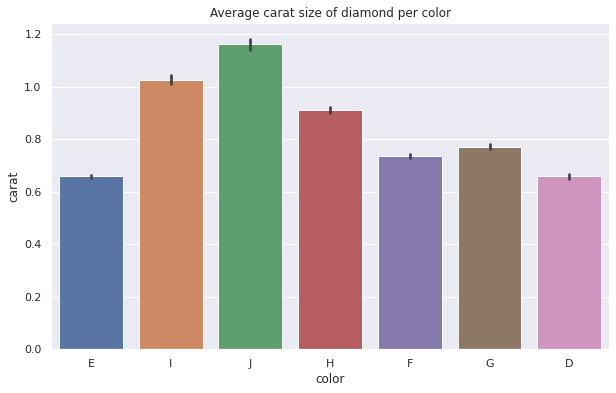

In [ ]:
# Plotting color against carats
sns.set(rc={'figure.figsize':(10,6)})
plt.title("Average carat size of diamond per color")
sns.barplot(x='color', y='carat',  data = diamond)
diamond.groupby('color')['carat'].mean().sort_values(ascending=False)

Diamonds that are bought with the highest carats are of the J color on average .

Diamonds that are bought with the smallest carats are of color D on average.

cut
Fair         1.046137
Premium      0.891955
Good         0.849185
Very Good    0.806381
Ideal        0.702837
Name: carat, dtype: float64

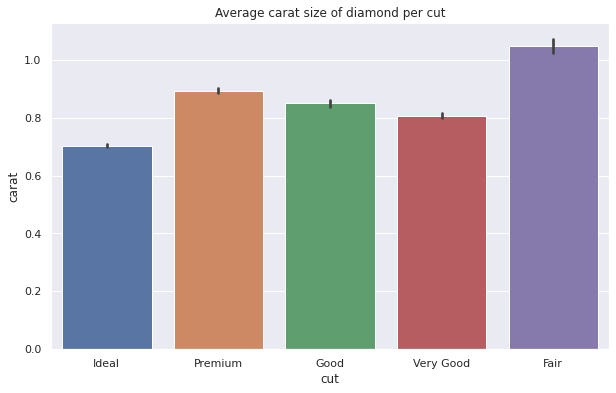

In [ ]:
# Plotting cut against carat
sns.set(rc={'figure.figsize':(10,6)})
plt.title("Average carat size of diamond per cut")
sns.barplot(x='cut', y='carat',  data = diamond)
diamond.groupby('cut')['carat'].mean().sort_values(ascending=False)

Diamonds that are bought with the highest carats are of the fair cut on average .

Diamonds that are bought with the smallest carats are of ideal cut on average

clarity
I1      1.283846
SI2     1.077648
SI1     0.850482
VS2     0.763935
VS1     0.727158
VVS2    0.596202
IF      0.505123
VVS1    0.503321
Name: carat, dtype: float64

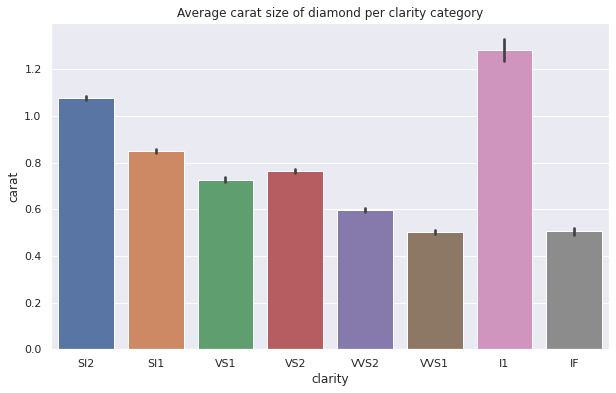

In [ ]:
# Plotting clarity against carat
sns.set(rc={'figure.figsize':(10,6)})
plt.title("Average carat size of diamond per clarity category")
sns.barplot(x='clarity', y='carat',  data = diamond)
diamond.groupby('clarity')['carat'].mean().sort_values(ascending=False)

Diamonds that are bought with the highest carats are of the I1 clarity on average .

Diamonds that are bought with the smallest carats are of VVS1 clarity on average.

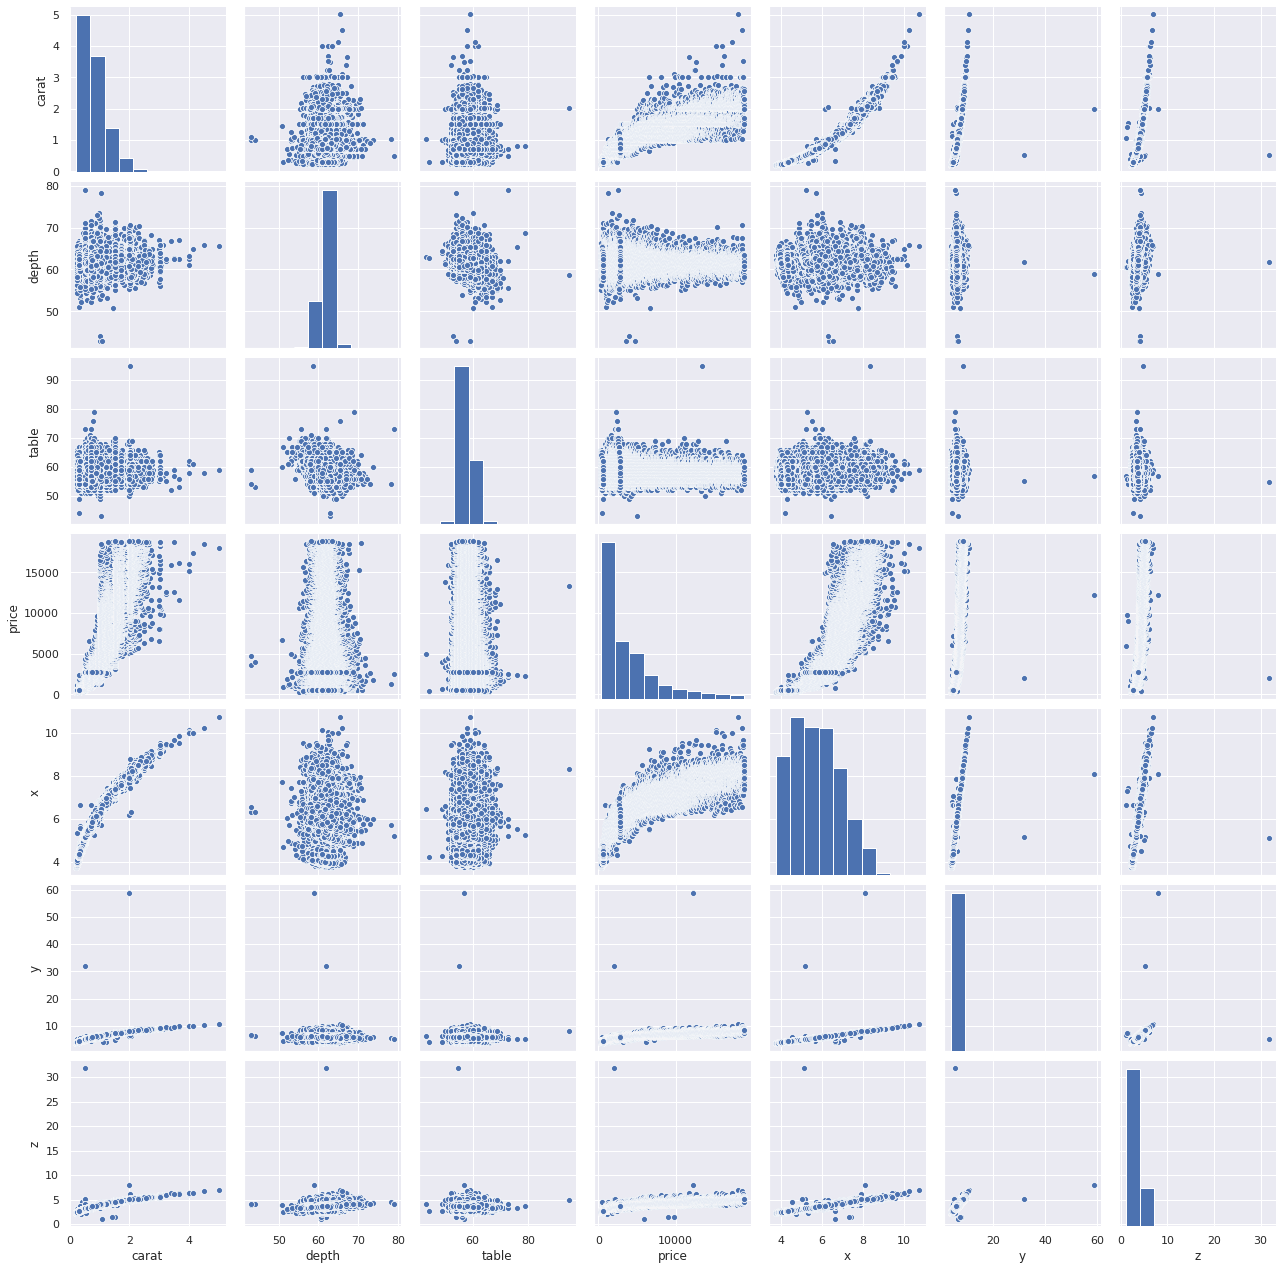

In [ ]:
# Plotting a pairplot of our variables
sns.pairplot(diamond)

price vs carat

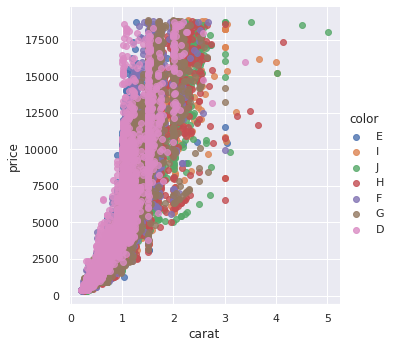

In [ ]:
sns.lmplot(x='carat', y='price', hue='color', 
           data=diamond , 
           fit_reg=False)

as the carats increase price alsoincrease but no linearly

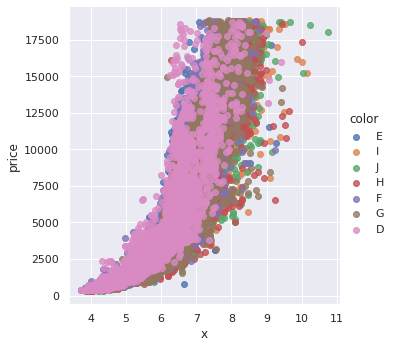

In [ ]:
	sns.lmplot(x='x', y='price', hue='color', 
           data=diamond , 
           fit_reg=False)

As x increases there is an increase in price but its not totally linear

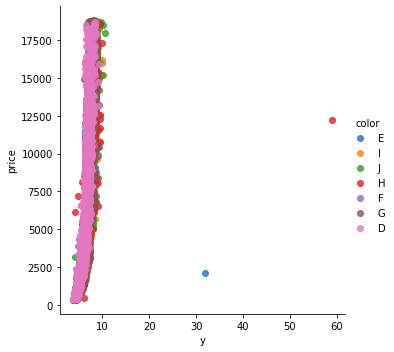

In [ ]:
sns.lmplot(x='y', y='price', hue='color', 
           data=diamond , 
           fit_reg=False)

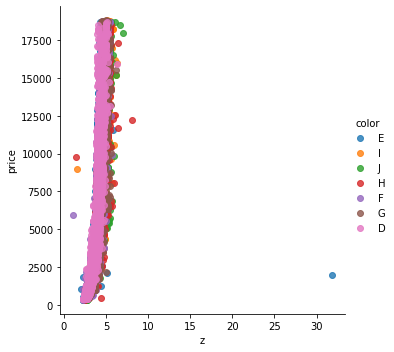

In [ ]:
sns.lmplot(x='z', y='price', hue='color', 
           data=diamond , 
           fit_reg=False)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


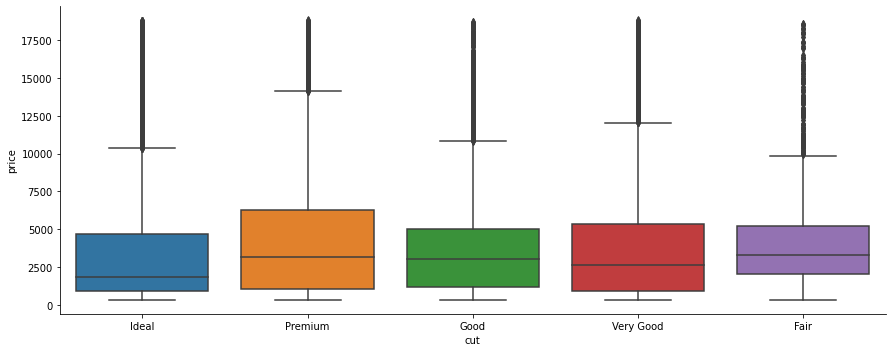

In [ ]:
sns.factorplot(x='cut', y='price', data=diamond, kind='box' ,aspect=2.5 )

Premium cut diamonds fetch better prices than the rest.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


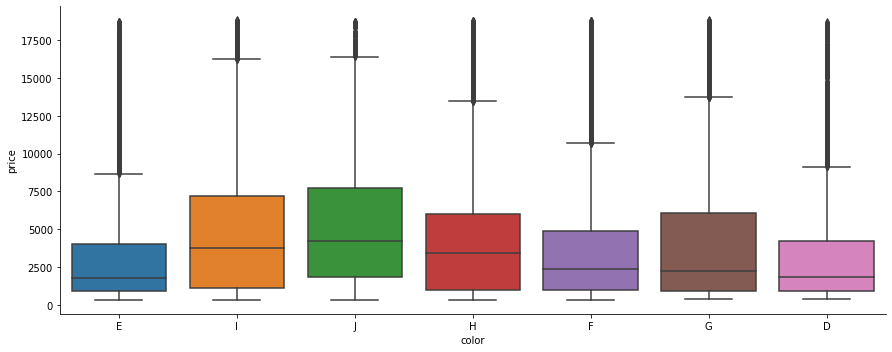

In [ ]:
sns.factorplot(x='color', y='price' , data=diamond , kind='box', aspect=2.5)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


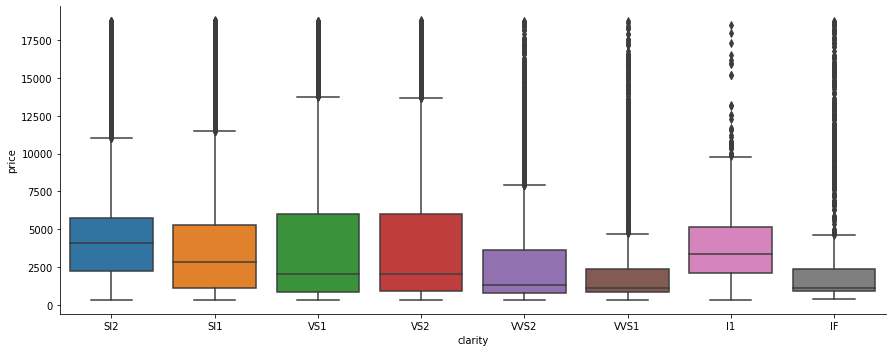

In [ ]:
sns.factorplot(x='clarity', y='price', data=diamond, kind='box' ,aspect=2.5 )

In [ ]:
diamond.groupby(["cut","color"])["price"].mean()

cut        color
Fair       D        4291.061350
           E        3682.312500
           F        3827.003205
           G        4232.412141
           H        5135.683168
           I        4685.445714
           J        4975.655462
Good       D        3405.382175
           E        3423.644159
           F        3498.761852
           G        4105.907940
           H        4276.254986
           I        5078.532567
           J        4574.172638
Ideal      D        2629.094566
           E        2597.550090
           F        3374.526536
           G        3718.469070
           H        3889.334831
           I        4451.970377
           J        4918.186384
Premium    D        3623.767790
           E        3538.914420
           F        4325.099571
           G        4502.207806
           H        5198.354140
           I        5939.557814
           J        6294.591584
Very Good  D        3470.467284
           E        3214.652083
           F        377

In [ ]:
diamond.groupby(["cut","clarity"])["price"].mean()

cut        clarity
Fair       I1         3703.533333
           IF         1912.333333
           SI1        4208.279412
           SI2        5173.916309
           VS1        4152.029586
           VS2        4174.724138
           VVS1       3871.352941
           VVS2       3349.768116
Good       I1         3584.694737
           IF         4098.323944
           SI1        3689.533333
           SI2        4571.627087
           VS1        3801.445988
           VS2        4262.236196
           VVS1       2254.774194
           VVS2       3079.108392
Ideal      I1         4335.726027
           IF         2272.913366
           SI1        3752.118169
           SI2        4755.876396
           VS1        3489.744497
           VS2        3282.223515
           VVS1       2468.129458
           VVS2       3250.290100
Premium    I1         3958.881773
           IF         3856.143478
           SI1        4448.621886
           SI2        5541.313859
           VS1        4485.46

In [ ]:
diamond.groupby(["clarity","color"])["price"].mean()

clarity  color
I1       D        3863.023810
         E        3488.421569
         F        3342.181818
         G        3545.540541
         H        4461.403727
         I        4302.184783
         J        5254.060000
IF       D        8307.369863
         E        3668.506329
         F        2750.836364
         G        2558.033774
         H        2287.869565
         I        1994.937063
         J        3363.882353
SI1      D        2976.146423
         E        3161.838005
         F        3714.225716
         G        3774.787449
         H        5027.035620
         I        5347.962755
         J        5186.048000
SI2      D        3931.101460
         E        4173.826036
         F        4475.640498
         G        5014.848544
         H        6088.065983
         I        7002.649123
         J        6520.958246
VS1      D        3030.158865
         E        2856.294301
         F        3796.717742
         G        4130.314392
         H        3780.68

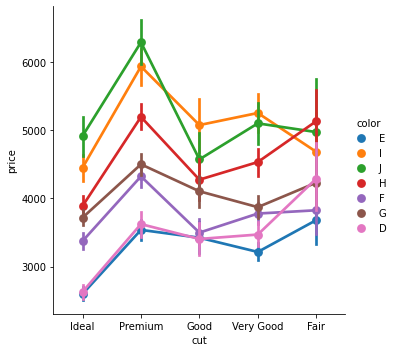

In [ ]:
sns.catplot(x="cut",y="price",hue="color",kind="point",data=diamond)

J premium diamonds are generally expensive than I but good cut i are expensive than j

and many more info can be obtained from this

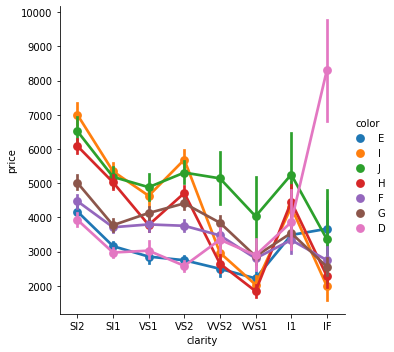

In [ ]:
sns.catplot(x="clarity",y="price",hue="color",kind="point",data=diamond)

IF clear diamonds are very expensive that stands out in the above plot

FEATURE ENGINEERING

In [ ]:
#create new column volume
diamond['volume'] = diamond['x']*diamond['y']*diamond['z']
diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250


In [ ]:
diamond['volume_from_density'] = diamond['carat']/15.755
diamond.head()
#I decided to calculate the volume from density because the shape of a diamond doest allow us to
# calculate the volumeby just multiplying xyz

,carat,cut,color,clarity,depth,table,price,x,y,z,volume,volume_from_density
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030,0.014599
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856,0.013329
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885,0.014599
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580,0.018407
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250,0.019676


IF clear diamonds are very expensive that stands out in the above plot

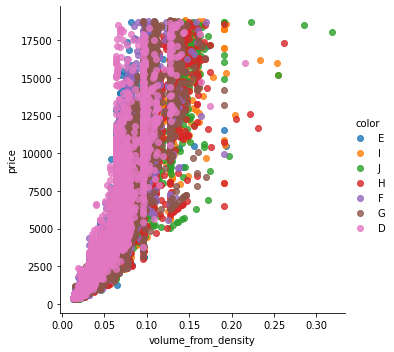

In [ ]:
sns.lmplot(x='volume_from_density', y='price', hue='color', 
           data=diamond , 
           fit_reg=False)

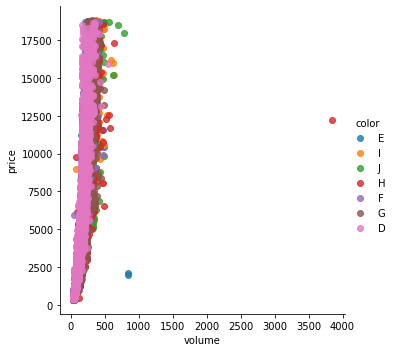

In [ ]:
sns.lmplot(x='volume', y='price', hue='color', 
           data=diamond , 
           fit_reg=False)

our generated features have an almost linear relationship with price

MODELING

In [ ]:
diamond1= pd.get_dummies(diamond,prefix_sep='_',drop_first=True)

We change categorical values into dummy values that canbe taken by the Model

In [ ]:
diamond1.head(3)


,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


Dividing our data into two sections .... to fit it in a model then get the important features

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# split into training and testing sets
X, y = diamond1.drop('price',axis=1), diamond1['price']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3,
     random_state=0
)
# standardize the features
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
X_train.shape

(37758, 23)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
rr  = RandomForestRegressor()

Fiting our Model

Installing rfpimp ....thiswillhelp us rank our Attributes in order of ther importances in relation to determining the price

In [ ]:
pip install rfpimp

     |████████████████████████████████| 163kB 3.8MB/s 
  Created wheel for rfpimp: filename=rfpimp-1.3.5-cp36-none-any.whl size=10260 sha256=6816d87b6b82f151d26a89a01a04577373d17b857e6ff8d60bf767f6537d6a54
  Stored in directory: /root/.cache/pip/wheels/2a/c8/bf/80f91224be00870f84a85aa1782cf6cd62c1289a173b66b8e9
  Created wheel for stratx: filename=stratx-0.4-cp36-none-any.whl size=35059 sha256=7f6d3bfe581d974fe46964a1e05e1a381ce78b7e10231b8c9f92173e81fef59b
  Stored in directory: /root/.cache/pip/wheels/7f/44/3a/110013d8115971c482c5537fe898ae1168436f6370115f665f
Successfully built rfpimp stratx


In [ ]:

from rfpimp import permutation_importances

def r2(rf, X_train, y_train):
    return r2_score(y_train, rr.predict(X_train))

perm_imp_rfpimp = permutation_importances(rr, X_train, y_train, r2)

Getting the features in order of their Importances

In [ ]:
perm_imp_rfpimp

,Importance
Feature,
carat,0.507049
y,0.371236
clarity_VVS2,0.035733
z,0.032472
clarity_SI2,0.029541
color_J,0.028352
clarity_VVS1,0.023150
clarity_VS2,0.022560
clarity_VS1,0.021352


# **Hypothesis testing**

**HYPOTHESIS TESTING 1**

we would like to know if there is a difference in the prices of diamond with regard to its color. d is said to be the most priced and J to be the least priced.

H0 = the price of diamond color D > the price of diamond color J

Ha = the price of diamond color D < the price of diamond color J

significance level = 0.05

In [ ]:
#we filter our data to only diamond color D
color_D = diamond[diamond.color == 'D']
color_D.reset_index(inplace= True)

In [ ]:
#we filter our data to only diamond colour J
color_J = diamond[diamond.color=='J']
color_J.reset_index(inplace = True)

In [ ]:
# Simple Random Sampling for color D
color_sample =color_D.sample(n = 100, replace="False")
color_sample

,index,carat,cut,color,clarity,depth,table,price,x,y,z
1464,10870,1.11,Good,D,SI2,60.1,63.0,4877,6.68,6.70,4.02
2493,22054,1.21,Premium,D,VS1,60.2,59.0,10083,6.89,6.86,4.14
3521,31235,0.42,Very Good,D,SI1,61.5,58.0,756,4.80,4.83,2.96
797,5457,0.63,Ideal,D,IF,61.2,53.0,3832,5.55,5.60,3.41
6043,47831,0.57,Very Good,D,SI1,59.8,60.0,1906,5.40,5.34,3.21
...,...,...,...,...,...,...,...,...,...,...,...
6310,49619,0.46,Good,D,IF,58.6,59.0,2139,5.06,5.11,2.98
2260,19208,1.07,Premium,D,VS2,60.9,59.0,7954,6.63,6.58,4.02
2965,27847,0.30,Ideal,D,VS1,61.0,57.0,651,4.31,4.32,2.63
2994,28108,0.36,Ideal,D,SI1,62.7,57.0,663,4.54,4.59,2.86


In [ ]:
# Simple Random Sampling for color J 
color_sample1 =color_J.sample(n = 100, replace="False")
color_sample1

,index,carat,cut,color,clarity,depth,table,price,x,y,z
946,14890,1.33,Ideal,J,SI1,62.5,56.0,5996,7.05,6.99,4.39
788,12611,1.28,Premium,J,SI1,61.9,56.0,5290,7.13,7.00,4.37
815,12965,1.19,Very Good,J,SI1,60.0,57.0,5390,6.93,6.89,4.15
1227,19130,1.52,Premium,J,VS2,62.0,59.0,7899,7.31,7.28,4.52
2556,48146,0.70,Premium,J,VS2,61.2,60.0,1940,5.73,5.70,3.50
...,...,...,...,...,...,...,...,...,...,...,...
1171,18536,1.51,Premium,J,VS2,59.2,59.0,7553,7.53,7.47,4.44
1333,20113,1.52,Premium,J,VS1,62.2,59.0,8580,7.38,7.32,4.57
1015,16009,1.30,Premium,J,VVS2,62.9,60.0,6405,6.91,6.86,4.33
2561,48185,0.72,Premium,J,VS2,60.2,59.0,1944,5.85,5.81,3.51


In [ ]:
#get the dispersion for oursample  data clor D
color_sample.groupby('color')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
color,,,,,,,,
D,100.0,3139.47,3022.129818,478.0,937.5,1986.0,4323.25,14737.0


In [ ]:
color_D.groupby('color')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
color,,,,,,,,
D,6774.0,3168.106436,3353.391411,357.0,911.0,1836.5,4212.5,18693.0


In [ ]:
#get the dispersion for our data clor J
color_sample1.groupby('color')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
color,,,,,,,,
J,100.0,4720.0,4454.355002,380.0,1791.25,3527.0,5288.5,16994.0


In [ ]:
from scipy import stats
from scipy.stats import norm

In [ ]:
#our sample size is greater than 30, 
#we have two means so we can use the Z-test. we will calculate our z_score manually
sample_mean = 3518.17
pop_mean =3168.106436
pop_std = 3353.391411 
z_score = (sample_mean - pop_mean) /(pop_std/10)
print('our z_score is',z_score)

#we need to calculate the p value from our z score. we convert the z score to p value
prob = stats.norm.cdf(z_score)
prob
#our significance level is 0.05


our z_score is 1.0439090493632806


0.8517362645010764

## **Hypothesis 2**

* **Null-Hypothesis** : The average price of diamonds of fair cut is less or equal to   that of an Ideal  cut 

 (H0: u1 <= u2)

* **Alternative**: The average price of diamonds of fair cut is greater than that of ideal cut

 (H0: u1> u2)
* **Significance level** : a= 0.05 

* **P-value** : Calculated as 0.05

**Reason for hypothesis**

> We chose to test for this hypothesis since from our research, the fair cut is considered of a lower quality in the market due to its low sparkle so we would like to test if this reflects on its price in comparison with the ideal cut.

In [ ]:
# Selecting relevant columns for our hypothesis
relevant_df1 = diamond[['cut', 'price']]
relevant_df1

,cut,price
0,Ideal,326
1,Premium,326
2,Good,327
3,Premium,334
4,Good,335
...,...,...
53935,Ideal,2757
53936,Good,2757
53937,Very Good,2757
53938,Premium,2757


In [ ]:
# Selecting the fair category which will be our population 
cut_fair=relevant_df1[relevant_df1['cut'].str.contains("Fair")]
cut_fair

,cut,price
8,Fair,337
91,Fair,2757
97,Fair,2759
123,Fair,2762
124,Fair,2762
...,...,...
53757,Fair,2724
53800,Fair,2732
53863,Fair,2743
53879,Fair,2745


In [ ]:
# Taking a look at our population standard deviation and mean
cut_fair.describe()

,price
count,1609.000000
mean,4357.500932
std,3561.136245
min,337.000000
25%,2050.000000
50%,3282.000000
75%,5198.000000
max,18574.000000


In [ ]:
# Selecting our ideal variables for our sample
cut_ideal=relevant_df1[relevant_df1['cut'].str.contains("Ideal")]
cut_ideal

,cut,price
0,Ideal,326
11,Ideal,340
13,Ideal,344
16,Ideal,348
39,Ideal,403
...,...,...
53925,Ideal,2756
53926,Ideal,2756
53929,Ideal,2756
53935,Ideal,2757


In [ ]:
# Using Simple random sampling
df3_sample= cut_ideal.sample(n= 50,replace=False)
df3_sample.head()

,cut,carat
35956,Ideal,0.30
47515,Ideal,0.50
48118,Ideal,0.50
13737,Ideal,0.32
6678,Ideal,1.20


> **Reason for sampling technique** 
>*  Simple random sampling is a better sampling technique because it gives equal chance to all the data to be a part of our sample. 

>**Reason for sampling size**
> * We use a sample size of 50 because it is will accurately represent our total population. 

In [ ]:
df3_sample['price'].mean()

2944.9

In [ ]:
# Calculating the z statistic

# population average
pop_av= 4357.500
# sample av
sample_av=2944.9
# sample size
n = 50

# standard deviation of population
std_pop = 3561.13
# finish t- calculation
z= (sample_av-pop_av)/(std_pop/n**(1/2))
# z-statistic
print('The z statistic/ z score is ', z)

The z statistic/ z score is  -2.80489350038925


In [ ]:
# Computing the P-values
import scipy
from scipy import stats

p= scipy.stats.norm.sf(abs(z))
p

0.0025166603747849435

In [ ]:
if p<= 0.05:
  print("We reject null hypothesis in favour of the alternative hypothesis, The average price of diamonds of fair cut is greater than that of an Ideal cut is statistically significant")
else:
  print("We do not reject null hypothesis, The average price of diamonds of fair cut is less or equal to that of an Ideal cut is not statistically significant") 

We reject null hypothesis in favour of the alternative hypothesis, The average price of diamonds of fair cut is greater than that of an Ideal cut is statistically significant


In [ ]:
# Test for sensitivity
a= 0.01
if (p< a):
  print(' Reject null hypothesis accept alternative hypothesis')
else:
  print('fail to reject null hypothesis')

 Reject null hypothesis accept alternative hypothesis


## **Hypothesis 3**

* **Null-Hypothesis** : The average carats of diamonds of fair cut is greater or equal to   that of an Ideal  cut 

 (H0: u1 <= u2)

* **Alternative**: The average carats of diamonds of fair cut is less than that of ideal cut

 (H0: u1< u2)
* **Significance level** : a= 0.05 

* **P-value** : Calculated as 0.05

**Reason for hypothesis**

> From our research, it is said that fair cut diamonds are usually bought in larger carats as compared to those of higher grade of cut due to their low quality. To confirm that this is the case we tested a hypothesis comparing it with the ideal cut.

In [ ]:
# Selecting relevant columns for our hypothesis
relevant_df2 = diamond[['cut', 'carat']]
relevant_df2

,cut,carat
0,Ideal,0.23
1,Premium,0.21
2,Good,0.23
3,Premium,0.29
4,Good,0.31
...,...,...
53935,Ideal,0.72
53936,Good,0.72
53937,Very Good,0.70
53938,Premium,0.86


In [ ]:
# Selecting the fair category which will be our population 
cut_fair=relevant_df2[relevant_df2['cut'].str.contains("Fair")]
cut_fair.describe()

,carat
count,1610.000000
mean,1.046137
std,0.516404
min,0.220000
25%,0.700000
50%,1.000000
75%,1.200000
max,5.010000


Our population has a mean of 1.04 and a standard deviation of 0.516

In [ ]:
# Selecting our ideal variables for our sample
cut_ideal=relevant_df2[relevant_df2['cut'].str.contains("Ideal")]
cut_ideal

,cut,carat
0,Ideal,0.23
11,Ideal,0.23
13,Ideal,0.31
16,Ideal,0.30
39,Ideal,0.33
...,...,...
53925,Ideal,0.79
53926,Ideal,0.71
53929,Ideal,0.71
53935,Ideal,0.72


In [ ]:
# Using Simple random sampling
df2_sample= cut_ideal.sample(n= 50,replace=False)
df2_sample.head()

,cut,carat
35918,Ideal,0.43
4247,Ideal,0.90
19056,Ideal,1.25
25071,Ideal,1.21
17846,Ideal,1.07


> **Reason for sampling technique** 
>*  Simple random sampling is a better sampling technique because it gives equal chance to all the data to be a part of our sample. 

>**Reason for sampling size**
> * We use a sample size of fifty because it is will accurately represent our total population. 

In [ ]:
# Getting the mean
df2_sample['carat'].mean()

0.746699999999999

our sample meaan is 0.7467

In [ ]:
# Calculating the z statistic

# population average
pop_av= 1.04
# sample av
sample_av= 0.73
# sample size
n = 50

# standard deviation of population
std_pop = 0.516
# finish t- calculation
z2= (sample_av-pop_av)/(std_pop/n**(1/2))
# z-statistic
print('The z statistic/ z score is ', z2)

The z statistic/ z score is  -4.2481221350354605


In [ ]:
# Computing the P-values
import scipy
from scipy import stats

p = stats.norm.cdf(z2)
p

1.5364295669870952e-72

In [ ]:
if p1 >= 0.05:
    print("We do not reject null hypothesis, the claim that the average carats for fair cut diamonds is greater or equal to the ideal is not statistically significant ") 
else:
    print("We reject null hypothesis in favour of the alternative hypothesis, the difference between the carat size of the fair cut and the ideal cut is statistically significant")


We reject null hypothesis in favour of the alternative hypothesis, the difference between the carat size of the fair cut and the ideal cut is statistically significant


In [ ]:
# Test for sensitivity
a= 0.01
if (p1< a):
  print(' Reject null hypothesis accept alternative hypothesis')
else:
  print('fail to reject null hypothesis')

 Reject null hypothesis accept alternative hypothesis


**In conclusion from our hypothesis:**

> * The average price of diamonds of the fair cut is higher than that of the 
ideal cut.
* The  average carats for a fair cut diamond is higher than that of an ideal cut.